# Data Wrangling Template

## Gather

In [1]:
import pandas as pd
import zipfile

In [2]:
# Extract all contents from zip file
with zipfile.ZipFile('archive.zip', 'r') as myzip:
    myzip.extractall()

In [3]:
# Read CSV (comma-separated) file into DataFrame
df = pd.read_csv('online-job-postings.csv')

## Assess

In [4]:
df

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True
5,"Boutique ""Appollo""\r\nJOB TITLE: Saleswoman\r...","Jan 10, 2004",Saleswoman,"Boutique ""Appollo""",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"For further information, please contact Irina\...",NaN,01 February 2004,NaN,NaN,NaN,2004,1,False
6,OSI Assistance Foundation - Armenian Branch Of...,"Jan 11, 2004",Chief Accountant/ Finance Assistant,OSI Assistance Foundation - Armenian Branch Of...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"For submission of applications/ CVs, please\r\...",NaN,"16 January 2004, 6:00 pm.",NaN,NaN,NaN,2004,1,False
7,International Research & Exchanges Board (IREX...,"Jan 13, 2004",Non-paid part or full time Programmatic Intern,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,6 months,...,NaN,"To apply, please download and submit the\r\nap...",NaN,16 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
8,Yerevan Brandy Company \r\nJOB TITLE: Assista...,"Jan 13, 2004",Assistant to Managing Director,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"27 January 2004, 18:00",NaN,NaN,NaN,2004,1,False
9,American Embassy Yerevan\r\nANNOUNCEMENT NUMBE...,"Jan 13, 2004","Program Assistant (INL), FSN-8; FP-6*",American Embassy Yerevan\r\nANNOUNCEMENT NUMBE...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Interested candidates for this position should...,NaN,26 January 2004 \r\nDrafted: GSargsyan\r\nC...,NaN,NaN,NaN,2004,1,False


- Missing values (NaN)
- StartDate inconsistencies

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
jobpost             19001 non-null object
date                19001 non-null object
Title               18973 non-null object
Company             18994 non-null object
AnnouncementCode    1208 non-null object
Term                7676 non-null object
Eligibility         4930 non-null object
Audience            640 non-null object
StartDate           9675 non-null object
Duration            10798 non-null object
Location            18969 non-null object
JobDescription      15109 non-null object
JobRequirment       16479 non-null object
RequiredQual        18517 non-null object
Salary              9622 non-null object
ApplicationP        18941 non-null object
OpeningDate         18295 non-null object
Deadline            18936 non-null object
Notes               2211 non-null object
AboutC              12470 non-null object
Attach              1559 non-null object
Year              

In [ ]:
- Fix nondescriptive colunmn Headers (ApplicationP, AboutC, RequiredQual, ... also Job Requirment)

## Clean
#### Define
- Select all records in the StartDate column that have "As soon as possbile", "Immediately", etc. and replace the text in those cells with "ASAP"
- Select all nondescriptive and misspelled column headers (ApplicationP, AboutC, RequiredQual, JobRequirment) and replace them with full workds (ApplicationProcedure, AboutCompany, RequiredQualifiications, JobRequirement)

#### Code

In [6]:
df_clean = df.copy()

- Select all nondescriptive and misspelled column headers (ApplicationP, AboutC, RequiredQual, JobRequirment) and replace them with full words (ApplicationProcedure, AboutCompany, RequiredQualifications, JobRequirement)

In [8]:
df_clean = df_clean.rename(columns={'ApplicationP': 'ApplicationProcedure',
                                    'AboutC': 'AboutCompany', 'RequiredQual': 'RequiredQualifications', 'JobRequirment': 'JobRequirements'})

- Select all records in the StartDate column that have "As soon as possible", "Immediately", etc. and replace the text in those cells with "ASAP"

In [10]:
df_clean.StartDate.value_counts()

ASAP                   4754
Immediately             773
As soon as possible     543
Upon hiring             261
Immediate               259
                       ... 
Late August 2004          1
14 September 2015         1
05 March 2015             1
09 August 2004            1
15 October 2007           1
Name: StartDate, Length: 1186, dtype: int64

In [18]:
asap_list = ['Immediately', 'As soon as possible', 'Upon hiring',
             'Immediate', 'Immediate employment', 'As soon as possible.', 'Immediate job opportunity',
             '"Immediate employment, after passing the interview."',
             'ASAP preferred', 'Employment contract signature date',
             'Immediate employment opportunity', 'Immidiately', 'ASA',
             'Asap', '"The position is open immediately but has a flexible start date depending on the candidates earliest availability."',
             'Immediately upon agreement', '20 November 2014 or ASAP',
             'immediately', 'Immediatelly',
             '"Immediately upon selection or no later than November 15, 2009."',
             'Immediate job opening', 'Immediate hiring', 'Upon selection',
             'As soon as practical', 'Immadiate', 'As soon as posible',
             'Immediately with 2 months probation period',
             '12 November 2012 or ASAP', 'Immediate employment after passing the interview',
             'Immediately/ upon agreement', '01 September 2014 or ASAP',
             'Immediately or as per agreement', 'as soon as possible',
             'As soon as Possible', 'in the nearest future', 'immediate',
             '01 April 2014 or ASAP', 'Immidiatly', 'Urgent',
             'Immediate or earliest possible', 'Immediate hire',
             'Earliest  possible', 'ASAP with 3 months probation period.',
             'Immediate employment opportunity.', 'Immediate employment.',
             'Immidietly', 'Imminent', 'September 2014 or ASAP', 'Imediately']

for i in asap_list:# Finish the first line of the for loop here
    df_clean.StartDate.replace( i, "ASAP", inplace=True)

#### Test

In [19]:
df_clean

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationProcedure,OpeningDate,Deadline,Notes,AboutCompany,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True
5,"Boutique ""Appollo""\r\nJOB TITLE: Saleswoman\r...","Jan 10, 2004",Saleswoman,"Boutique ""Appollo""",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"For further information, please contact Irina\...",NaN,01 February 2004,NaN,NaN,NaN,2004,1,False
6,OSI Assistance Foundation - Armenian Branch Of...,"Jan 11, 2004",Chief Accountant/ Finance Assistant,OSI Assistance Foundation - Armenian Branch Of...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"For submission of applications/ CVs, please\r\...",NaN,"16 January 2004, 6:00 pm.",NaN,NaN,NaN,2004,1,False
7,International Research & Exchanges Board (IREX...,"Jan 13, 2004",Non-paid part or full time Programmatic Intern,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,6 months,...,NaN,"To apply, please download and submit the\r\nap...",NaN,16 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
8,Yerevan Brandy Company \r\nJOB TITLE: Assista...,"Jan 13, 2004",Assistant to Managing Director,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"27 January 2004, 18:00",NaN,NaN,NaN,2004,1,False
9,American Embassy Yerevan\r\nANNOUNCEMENT NUMBE...,"Jan 13, 2004","Program Assistant (INL), FSN-8; FP-6*",American Embassy Yerevan\r\nANNOUNCEMENT NUMBE...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Interested candidates for this position should...,NaN,26 January 2004 \r\nDrafted: GSargsyan\r\nC...,NaN,NaN,NaN,2004,1,False


In [20]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
jobpost                   19001 non-null object
date                      19001 non-null object
Title                     18973 non-null object
Company                   18994 non-null object
AnnouncementCode          1208 non-null object
Term                      7676 non-null object
Eligibility               4930 non-null object
Audience                  640 non-null object
StartDate                 9675 non-null object
Duration                  10798 non-null object
Location                  18969 non-null object
JobDescription            15109 non-null object
JobRequirement            16479 non-null object
RequiredQualifications    18517 non-null object
Salary                    9622 non-null object
ApplicationProcedure      18941 non-null object
OpeningDate               18295 non-null object
Deadline                  18936 non-null object
Notes                     2211 non

In [21]:
df_clean.StartDate.value_counts()

ASAP                 6856
01 September 2012      31
March 2006             27
November 2006          22
January 2010           19
                     ... 
Januray 2015            1
23 April 2005           1
Late August 2004        1
18 April 2007           1
27 April 2013           1
Name: StartDate, Length: 1140, dtype: int64

In [22]:
for i in asap_list:# Finish the first line of the for loop here
    assert i not in df_clean.StartDate.values

#### Analysis & Visualization

In [23]:
# Number of 'ASAP' start dates (numerator)
asap_counts = df_clean.StartDate.value_counts()['ASAP']
asap_counts

6856

In [27]:
# Number of 'non_empty_counts' start dates (denominator)
non_empty_counts = df_clean.StartDate.count()
non_empty_counts

9675

In [28]:
# Percentage of positions with an urgent start date i.e. 'ASAP'
asap_counts / non_empty_counts

0.7086304909560723

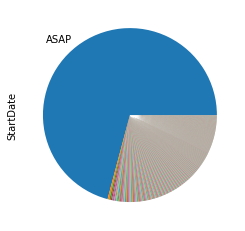

In [29]:
%matplotlib inline
import numpy as np
labels = np.full(len(df_clean.StartDate.value_counts()), "", dtype=object)
labels[0] = 'ASAP'
df_clean.StartDate.value_counts().plot(kind="pie", labels=labels)